# Neural Network from Scratch
### Author : Alankar
### Reference: Online blogs, towardsdatascience.com

Consider Y, X1, X2, X2

A1 i.e. value to input at the first neuron on in the network is

f(X1,X2,X3)=W11*X1 + W12*X2 + W13*X3 + b11

This is further activated by

A1 = g(f(X1,X2,X3))=g(W11*X1 + W12*X2 + W13*X3 + b11)

Similarly

A2 = g(f(X1,X2,X3))=g(W11*X1 + W12*X2 + W13*X3 + b12)

A3 = g(f(X1,X2,X3))=g(W11*X1 + W12*X2 + W13*X3 + b13)


g is an activation function. Here are a few examples of activation functions

If there are two hidden layers, activated valued on the hidden layers are given by A and B.

A = W1 X + b1

B = W2 A + b2

Y_pred = W3 B + b3

W1, W2, W3 will be matrices of appropriate sizes.

### Sigmoid function in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np

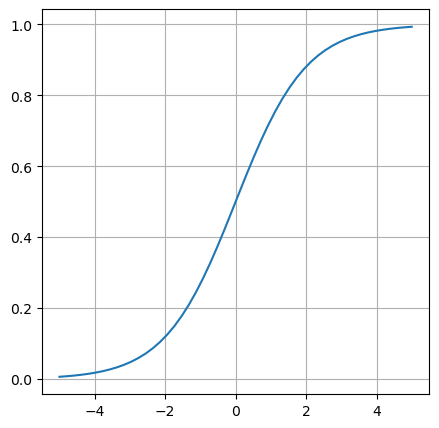

In [2]:
x = np.linspace(-5, 5, 50)
z = 1/(1 + np.exp(-x))

plt.subplots(figsize=(5, 5))
plt.plot(x, z)
plt.grid()
plt.show()

### tanh function in Python

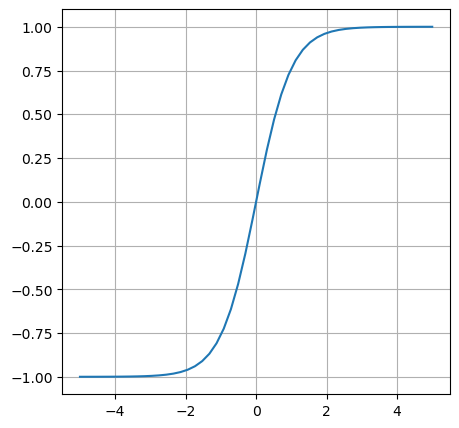

In [3]:
# tanh function in Python
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 50)
z = np.tanh(x)

plt.subplots(figsize=(5, 5))
plt.plot(x, z)
plt.grid()
plt.show()

### Softmax function in Python
Softmax is a generalization sigmoid i.e. Softmax is used in multiple dimensions. And is generally used as an activation function in the output layer.

### Rectified Linear Unit (ReLU)

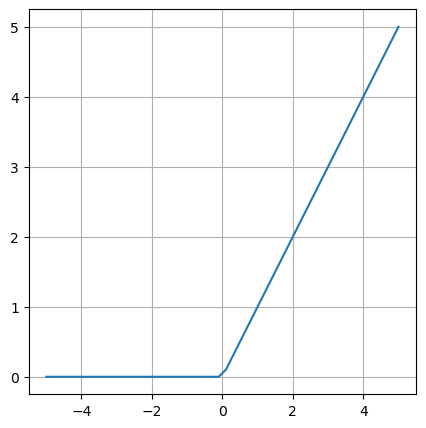

In [4]:
# ReLU in Python
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-5, 5, 50)
z = [max(0, i) for i in x]

plt.subplots(figsize=(5, 5))
plt.plot(x, z)
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Define ReLU function

In [6]:
def relu(z): # takes a numpy array as input and returns activated array
    a = np.maximum(0,z)
    return a

### Initialize parameters

In [7]:
def initialize_params(layer_sizes): #takes a list of the layer sizes as input and returns initialized parameters
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        # rand(d0,d1) will return an array of size d0 x d1.
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

### Loss or cost is defined as $J(W, B) = \frac{1}{2m} * \Sigma (Y_{pred} - Y_{true})^2$

W and B represent weight and bias matrices. m is the number of observastion i.e. data points.

In [8]:
def compute_cost(values, Y_train): #takes true values and dictionary having activations of 
# all layers as input and returns cost
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

### Define forward propagation

In [9]:
def forward_propagation(X_train, params):
    #takes input training features and parameters as input and returns a dictionary 
# containining the numpy arrays of activations of all layers
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1: # transformation from input layer
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)])
        else: # transformation from non-input layer
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers: # Do not use activation function in the output layer
                values['A' + str(i)] = values['Z' + str(i)]
            else: # use activation function for non-output layers
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

### Define function for backward propagation

In [10]:
def backward_propagation(params, values, X_train, Y_train): 
    #takes parameters, activations, training set as input and returns gradients wrt parameters
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

### Function for updating paramters (this is done after backpropagation)

In [11]:
def update_params(params, grads, learning_rate): 
    #takes parameters, gradients and learning rate as input and returns updated parameters
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

### Define function for accuracy

In [25]:
def compute_accuracy(X_train, X_test, Y_train, Y_test, params, layer_sizes): #compute accuracy on test and training data given learnt parameters
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
    test_acc = np.sqrt(mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T))
    return train_acc, test_acc


### Define function for predicting

In [13]:
def predict(X, params):  #predict on new array X given learnt parameters
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

### Assemble the model i.e. create the model i.e. setup the model

In [14]:
#MSE_Train
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate): #trains the model
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        print(f'cost of {i}th iteration: {cost}')
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        #print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

### Run the model

In [33]:
# import pandas for importing csv files  
import pandas as pd
from sklearn.preprocessing import normalize
df = pd.read_csv('dummy_data.csv', header=None)
df.head()                          

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
num_cols = df.shape[1]
df.columns = ['Column' + str(i) for i in range(num_cols)]

In [35]:
df

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
# Separate features (X) and target variable (y)
X, Y = df.iloc[:, :-1], df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
X_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [39]:
# Convert to NumPy arrays
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [40]:
model1 = model(X_train, Y_train, [13, 5, 5, 1], 1000, 0.01)

cost of 0th iteration: 303.40762067089514
cost of 1th iteration: 303.3940351515662
cost of 2th iteration: 303.38047833158305
cost of 3th iteration: 303.3669474046098
cost of 4th iteration: 303.35344228011786
cost of 5th iteration: 303.33996128215
cost of 6th iteration: 303.3265190322308
cost of 7th iteration: 303.31311603674607
cost of 8th iteration: 303.2997401363282
cost of 9th iteration: 303.2863880819605
cost of 10th iteration: 303.273048839966
cost of 11th iteration: 303.2597186680538
cost of 12th iteration: 303.24639554587554
cost of 13th iteration: 303.23308082981856
cost of 14th iteration: 303.2197749515043
cost of 15th iteration: 303.20647995161943
cost of 16th iteration: 303.19319076250036
cost of 17th iteration: 303.17990295277485
cost of 18th iteration: 303.166615164679
cost of 19th iteration: 303.1533290789401
cost of 20th iteration: 303.1400466904957
cost of 21th iteration: 303.1267683816923
cost of 22th iteration: 303.11349588965936
cost of 23th iteration: 303.1002286335

In [41]:
model1

{'W1': array([[-2.07398201e-03, -5.05655258e-03,  5.06171091e-03,
         -8.98977200e-03, -1.66050608e-04, -1.77405290e-02,
         -1.37106226e-02, -8.08802733e-03,  1.80351440e-03,
         -1.80793642e-02, -1.08912460e-02, -3.17880399e-02,
         -5.34414653e-03],
        [-7.93983038e-03,  3.05987098e-02, -6.81786315e-03,
         -6.27019452e-03, -1.45051022e-03, -1.33903560e-02,
          1.66428873e-02,  1.31131664e-02, -4.66012038e-03,
         -2.30267457e-05, -7.54146770e-03,  1.08699507e-01,
         -4.86204707e-03],
        [-2.25944524e-02,  1.16968148e-01, -8.32180593e-03,
         -1.53146999e-02, -1.81735141e-03,  3.14112780e-02,
          1.54879803e-02,  2.27490044e-02, -1.62198104e-02,
         -5.90608493e-03,  3.55055619e-02,  3.93140631e-01,
         -3.98615475e-02],
        [-1.78785674e-02,  2.33491783e-02, -6.62593405e-04,
         -1.38500902e-02,  2.32399511e-02,  6.85081038e-03,
         -7.36413395e-03,  7.03313542e-03,  1.31872932e-02,
         -1.3

In [42]:
compute_accuracy(X_train, X_test, Y_train, Y_test, model1, [13,5,5,1])

(8.995166598527916, 8.442594389694793)